# 4 Updating data frames
In this lesson we will introduce methods for updating a pandas.DataFrame, these include adding and removing columns and updating specific values.

In [4]:
import numpy as np
import pandas as pd
import random  # Used for randomly sampling integers

# Set the seed
random.seed(42)

# Import data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

In [19]:
# Add new column body_mass_kg 
penguins['body_mass_kg'] = penguins['body_mass_g']/1000

# Confirm the new column is in the data frame
print("body_mass_kg is in the data frame's columns: ", 'body_mass_kg' in penguins.columns)

# Look at the new column
penguins.head()

body_mass_kg is in the data frame's columns:  True


,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45


In [10]:
# Create random 3-digit codes
codes = random.sample(range(100,1000), len(penguins))  # Sampling w/o replacement

# Insert codes at the front of data frame
penguins.insert(loc=0,  # Index
                column='id_code',
                value=codes)
        
penguins.head()

ValueError: cannot insert id_code, already exists

In [26]:
# Create columns with observer codes and flipper length in cm
penguins = penguins.assign(flipper_length_cm=penguins.flipper_length_mm/10, 
                           observer=random.choices(['A','B','C'],  # Sample with replacement
                                                    k=len(penguins))
                          )
# Examine result
penguins.head()

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,flipper_length_cm,observer
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75,18.1,C
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80,18.6,B
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25,19.5,C
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,C
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45,19.3,A


In [27]:
# Remove duplicate length and mass measurements
penguins = penguins.drop(columns=['flipper_length_mm','body_mass_g'])

# Confirm result
print(penguins.columns)

Index(['id_code', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'sex', 'year', 'body_mass_kg', 'flipper_length_cm', 'observer'],
      dtype='object')


In [28]:
penguins = penguins.set_index('id_code')
penguins

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer
id_code,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,male,2007,3.750,18.1,C
214,Adelie,Torgersen,39.5,17.4,female,2007,3.800,18.6,B
125,Adelie,Torgersen,40.3,18.0,female,2007,3.250,19.5,C
859,Adelie,Torgersen,NaN,NaN,NaN,2007,NaN,NaN,C
381,Adelie,Torgersen,36.7,19.3,female,2007,3.450,19.3,A
...,...,...,...,...,...,...,...,...,...
140,Chinstrap,Dream,55.8,19.8,male,2009,4.000,20.7,C
183,Chinstrap,Dream,43.5,18.1,female,2009,3.400,20.2,B
969,Chinstrap,Dream,49.6,18.2,male,2009,3.775,19.3,A


In [29]:
# Check bill lenght of the penguin with ID 127
penguins.at[127, 'bill_length_mm'] = 38.3

# Confirm value was updated
penguins.loc[127]


species              Adelie
island               Biscoe
bill_length_mm         38.3
bill_depth_mm          18.1
sex                    male
year                   2007
body_mass_kg           3.95
flipper_length_cm      18.5
observer                  C
Name: 127, dtype: object

If we want to access or update a single value by index position we ust `iat[]` locater

Dynamically get the location of a single column
```
df.columns.get_loc('column_name')
```

## Check in
a. Obtain the location of the bill_length_mm column.

b. Use iat[] to access the same bill length value for the penguin with ID 859 and revert it back to an NA. Confirm your update using iloc[].

In [35]:
bill_length_index = penguins.columns.get_loc('bill_length_mm')
penguins.iat[3,bill_length_index] = np.nan
penguins.iloc[3]

species                 Adelie
island               Torgersen
bill_length_mm             NaN
bill_depth_mm              NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
flipper_length_cm          NaN
observer                     C
Name: 859, dtype: object

## Multiple values in a column
### Using a condition

Example:
    We want to classify the Palmer penguin such that:
penguins with body mass less than 3kg as small,
penguins with body mass greater or equal than 3 kg but less than 5 kg as medium,
and those with body mass greater or equal than 5 kg as large.

In [37]:
# Create a list with the conditions
conditions = [penguins.body_mass_kg < 3, 
              (3 <= penguins.body_mass_kg) & (penguins.body_mass_kg < 5),
              5 <= penguins.body_mass_kg]

# Create a list with the choices
choices = ["small",
           "medium",
           "large"]

# Add the selections using np.select
penguins['size'] = np.select(conditions, 
                             choices, 
                             default=np.nan) # Value for anything outside conditions

# Display the updated data frame to confirm the new column
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer,size
id_code,,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,male,2007,3.75,18.1,C,medium
214,Adelie,Torgersen,39.5,17.4,female,2007,3.80,18.6,B,medium
125,Adelie,Torgersen,40.3,18.0,female,2007,3.25,19.5,C,medium
859,Adelie,Torgersen,NaN,NaN,NaN,2007,NaN,NaN,C,nan
381,Adelie,Torgersen,36.7,19.3,female,2007,3.45,19.3,A,medium


## Update values by selecting them

We can do this with `loc`or `iloc`and assigning new values

Syntax:
    
    ```
    df.loc[row_selection, column_name] = new_values
    ```
### Example
Update the 'male' values in the sex column to 'M'

In [38]:
# Select rows with sex=male and simplify values in 'sex' column
penguins.loc[penguins.sex=='male', 'sex'] = 'M'

# Check changes in 'sex' column specifically
print(penguins['sex'].unique())

['M' 'female' nan]


### Best practices
We want to update the 'female' values in 'sex' column to 'F'

In [41]:
# Select rows where 'sex' is 'female' and then attempt to update 'sex' column values
penguins[penguins.sex=='female']['sex'] = 'F' # This raises SettingWithCopyWarning

/tmp/ipykernel_1047557/534867616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins[penguins.sex=='female']['sex'] = 'F' # This raises SettingWithCopyWarning



***Avoid chained indexing*** [][] and use .loc[]
The SettingWithCopyWarning often arises from chained indexing:

df[df['col'] == value]['col2'] = new_value


## Check-in
Update the “female” values in the penguins data frame to “F”. Don’t use chained indexing. Confirm that the values in the column were updated.
The best practice is to use .loc[] instead:

df.loc[df['col'] == value,'col2'] = new_value

.loc[] is generally more readable and explicitly modifies the original data frame.

df.loc[df['col'] == value,'col2'] = new_value

Warnings in Python are intended to be helpful and can prevent unintended data modification errors!


In [44]:
penguins.loc[penguins.sex=='female', 'sex'] = 'F'

This warning comes because some pandas operation return a view, and others return a copy of your data

## Example
We only want to use data from Biscoe island, after doing some analyses, we want to add a new column


In [46]:
# Select penguins from Biscoe island
biscoe = penguins[penguins.island=='Biscoe']

# ... Other analyses ...

# Add a column
biscoe['sample_col'] = 100  # This raises SettingWithCopyWarning

/tmp/ipykernel_1047557/844154415.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biscoe['sample_col'] = 100  # This raises SettingWithCopyWarning


We can also explicitely ask for a copy of a dataset when subsetting using the `copy`

In [48]:
# Make sure you get an independent data frame that won't alter the original
biscoe = penguins[penguins.island=='Biscoe'].copy()

# Add a column, no warning
biscoe['sample_col'] = 100

In [50]:
biscoe.head

<bound method NDFrame.head of         species  island  bill_length_mm  bill_depth_mm  sex  year  \
id_code                                                             
338      Adelie  Biscoe            37.8           18.3    F  2007   
617      Adelie  Biscoe            37.7           18.7    M  2007   
716      Adelie  Biscoe            35.9           19.2    F  2007   
127      Adelie  Biscoe            38.3           18.1    M  2007   
674      Adelie  Biscoe            38.8           17.2    M  2007   
...         ...     ...             ...            ...  ...   ...   
578      Gentoo  Biscoe             NaN            NaN  NaN  2009   
155      Gentoo  Biscoe            46.8           14.3    F  2009   
200      Gentoo  Biscoe            50.4           15.7    M  2009   
162      Gentoo  Biscoe            45.2           14.8    F  2009   
512      Gentoo  Biscoe            49.9           16.1    M  2009   

         body_mass_kg  flipper_length_cm observer    size  sample_col  


In [53]:
# Confirm that original data was not modified
print('sample_column' in penguins.columns)

False


# 5 Grouping
In this section we will go over the split-apply-combine strategy and the groupby() function.

In [56]:
# Load Palmer penguins data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [60]:
# Get the number of non-NA values in each column 
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [61]:
# Get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

In [62]:
# Get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

The general syntax for groupby() is:
df.groupby(columns_to_group_by).summary_method()


# Check-in
Use the max() method for pandas.DataFrames to calculate the maximum value of a penguin’s body mass by year and species.
Use (1) to display the highest body masses per year and species as a bar plot in descending order.

In [65]:
(penguins.groupby(["year", "species"])
.body_mass_g
.max()
)

year  species  
2007  Adelie       4675.0
      Chinstrap    4400.0
      Gentoo       6300.0
2008  Adelie       4700.0
      Chinstrap    4800.0
      Gentoo       6000.0
2009  Adelie       4775.0
      Chinstrap    4450.0
      Gentoo       6000.0
Name: body_mass_g, dtype: float64

<Axes: title={'center': 'Maximum Penguin Body Mass per Species per Year'}, xlabel='Body Mass (g)', ylabel='year, species'>

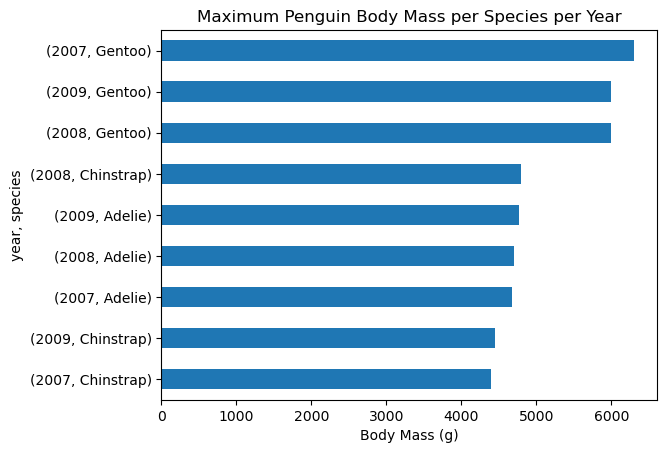

In [79]:
(penguins.groupby(["year", "species"])
.body_mass_g
.max()
.sort_values()
.plot(kind="barh",
     title = "Maximum Penguin Body Mass per Species per Year",
     ylabel = ("year, species"),
     xlabel = ("Body Mass (g)")))